
## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.1.3'

In [5]:
pd.set_option('display.max_columns', 100)

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [6]:
loans = pd.read_csv('loans.csv')

In [7]:
loans.shape

(2981, 14)

**Check out the info(), head(), and describe() methods on loans.**

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [9]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


## Exploratory Data Analysis

- Let's do some data visualization! 


**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


In [11]:
# Alternatively you can use seaborn library to create the same histogram (although due to bin creation, it might look different!)
import seaborn as sns

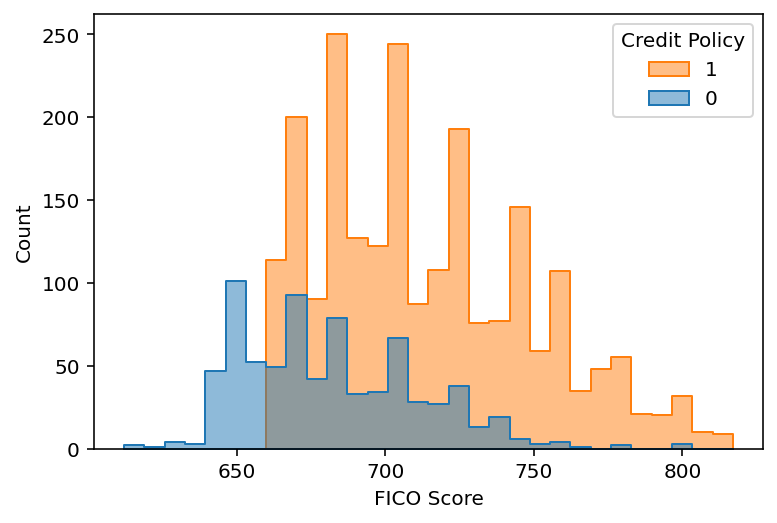

In [12]:
# Create histogram using Seaborn
sns.histplot(data=loans, x="fico", hue="credit.policy", element="step", alpha=0.5, stat="count",bins=30)

# Set plot labels and legend
plt.xlabel("FICO Score")
plt.ylabel("Count")
plt.legend(title="Credit Policy", labels=["1", "0"])

# Show the plot
plt.show()

**Create another histogram for `not.fully.paid` column.**

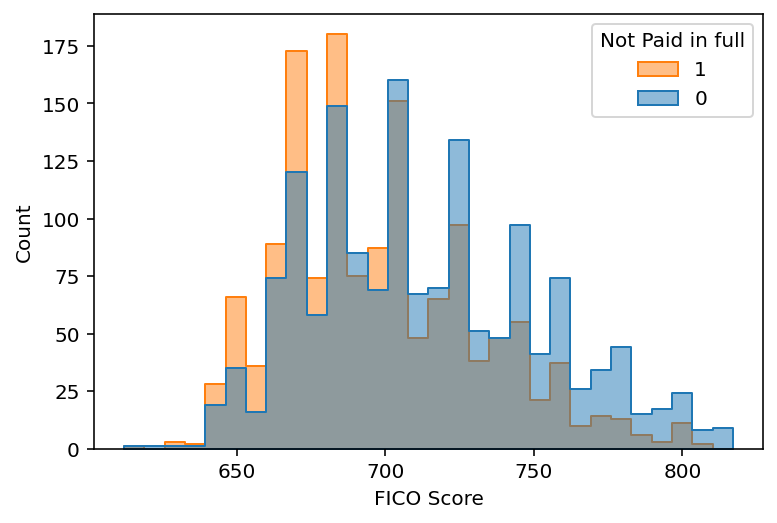

In [13]:
# Create histogram using Seaborn
sns.histplot(data=loans, x="fico", hue="not.fully.paid", element="step", alpha=0.5, stat="count",bins=30)

# Set plot labels and legend
plt.xlabel("FICO Score")
plt.ylabel("Count")
plt.legend(title="Not Paid in full", labels=["1", "0"])

# Show the plot
plt.show()

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

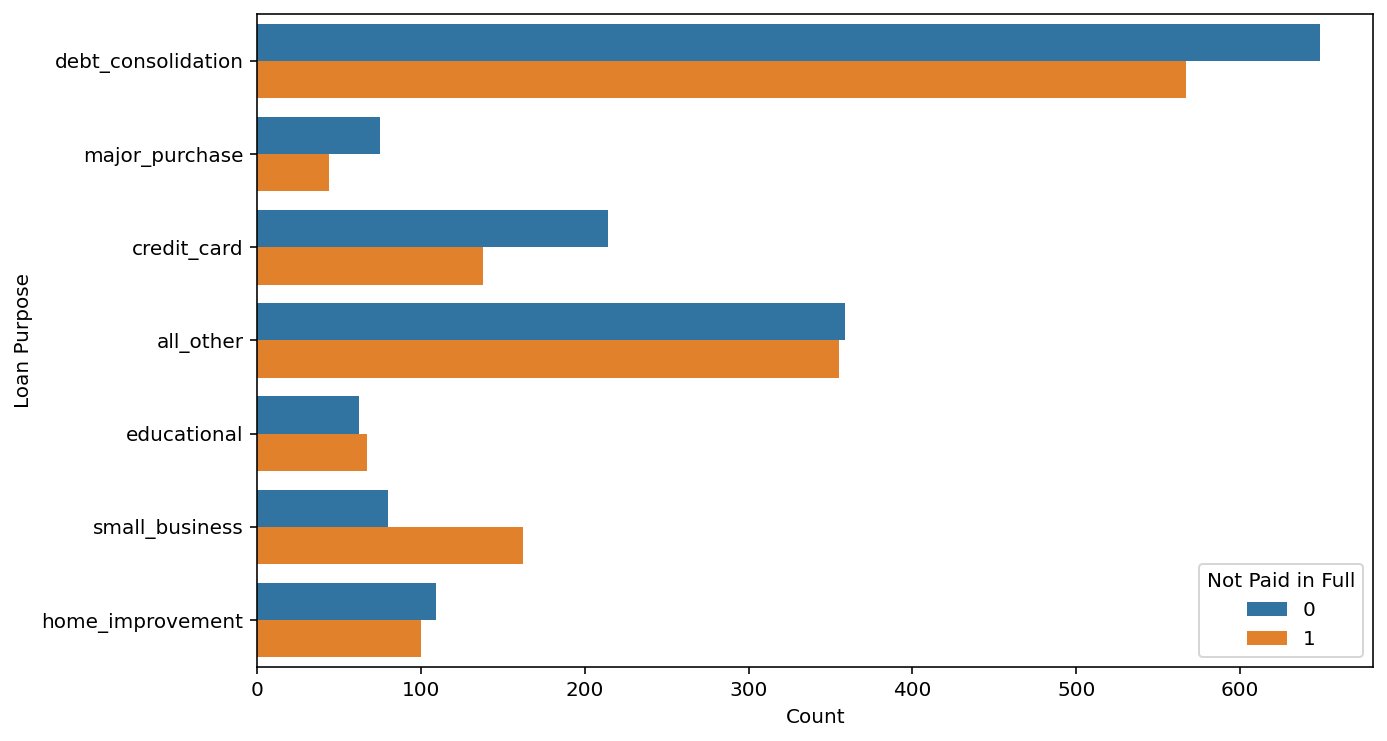

In [14]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,6))

# Create countplot using Seaborn
sns.countplot(data=loans, y="purpose", hue="not.fully.paid", ax=ax)

# Set plot labels and legend
plt.xlabel("Count")
plt.ylabel("Loan Purpose")
plt.legend(title="Not Paid in Full", labels=["0", "1"])

# Show the plot
plt.show()

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

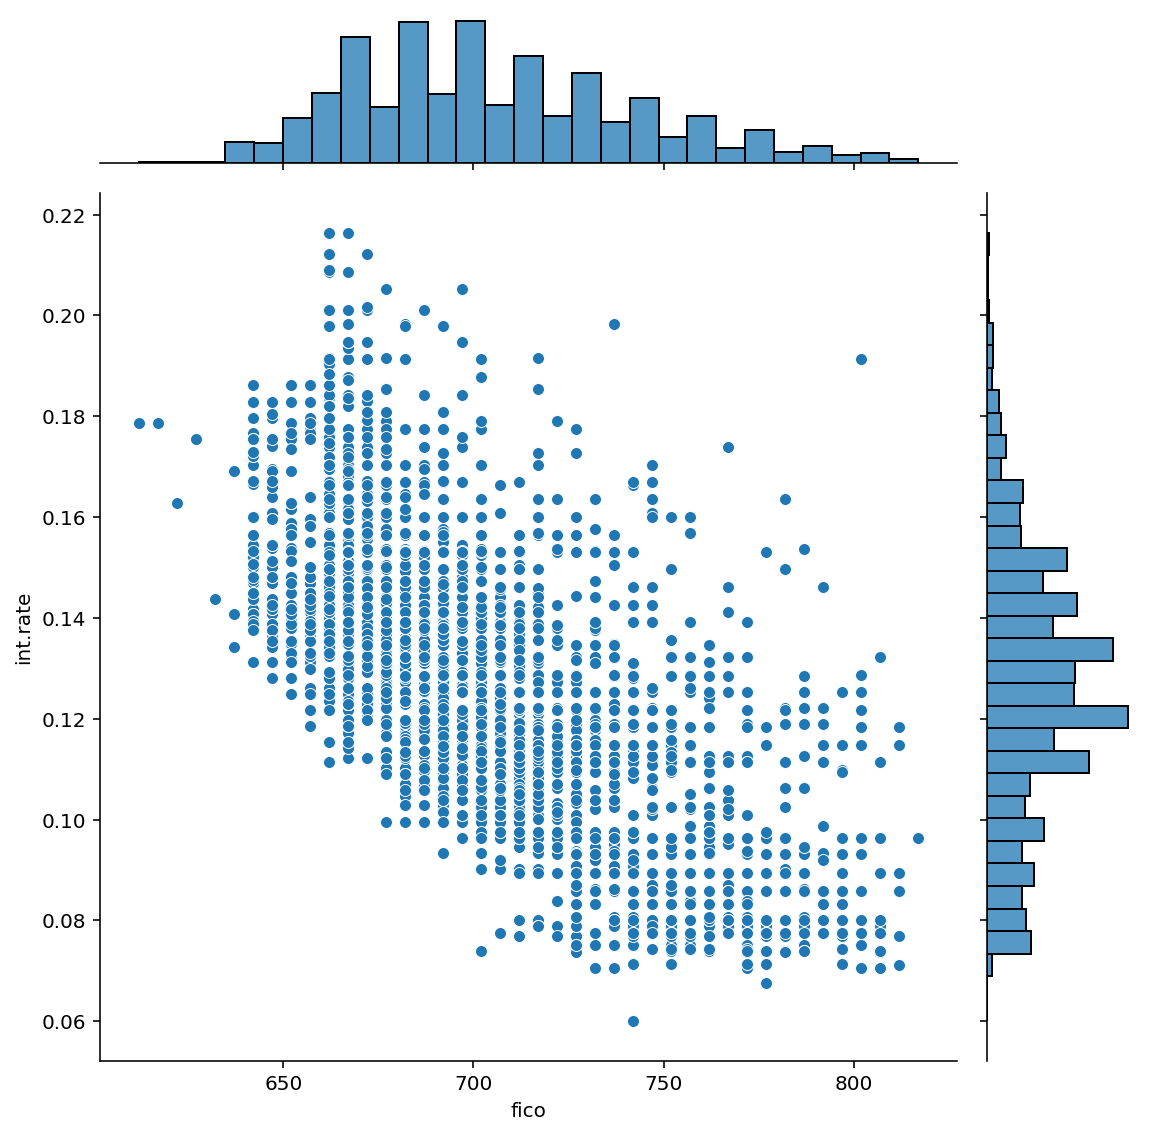

In [15]:
# Create jointplot using Seaborn
sns.jointplot(data=loans, x="fico", y="int.rate", height=8)

# Set plot labels
plt.xlabel("FICO Score")
plt.ylabel("Interest Rate")

# Show the plot
plt.show()

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

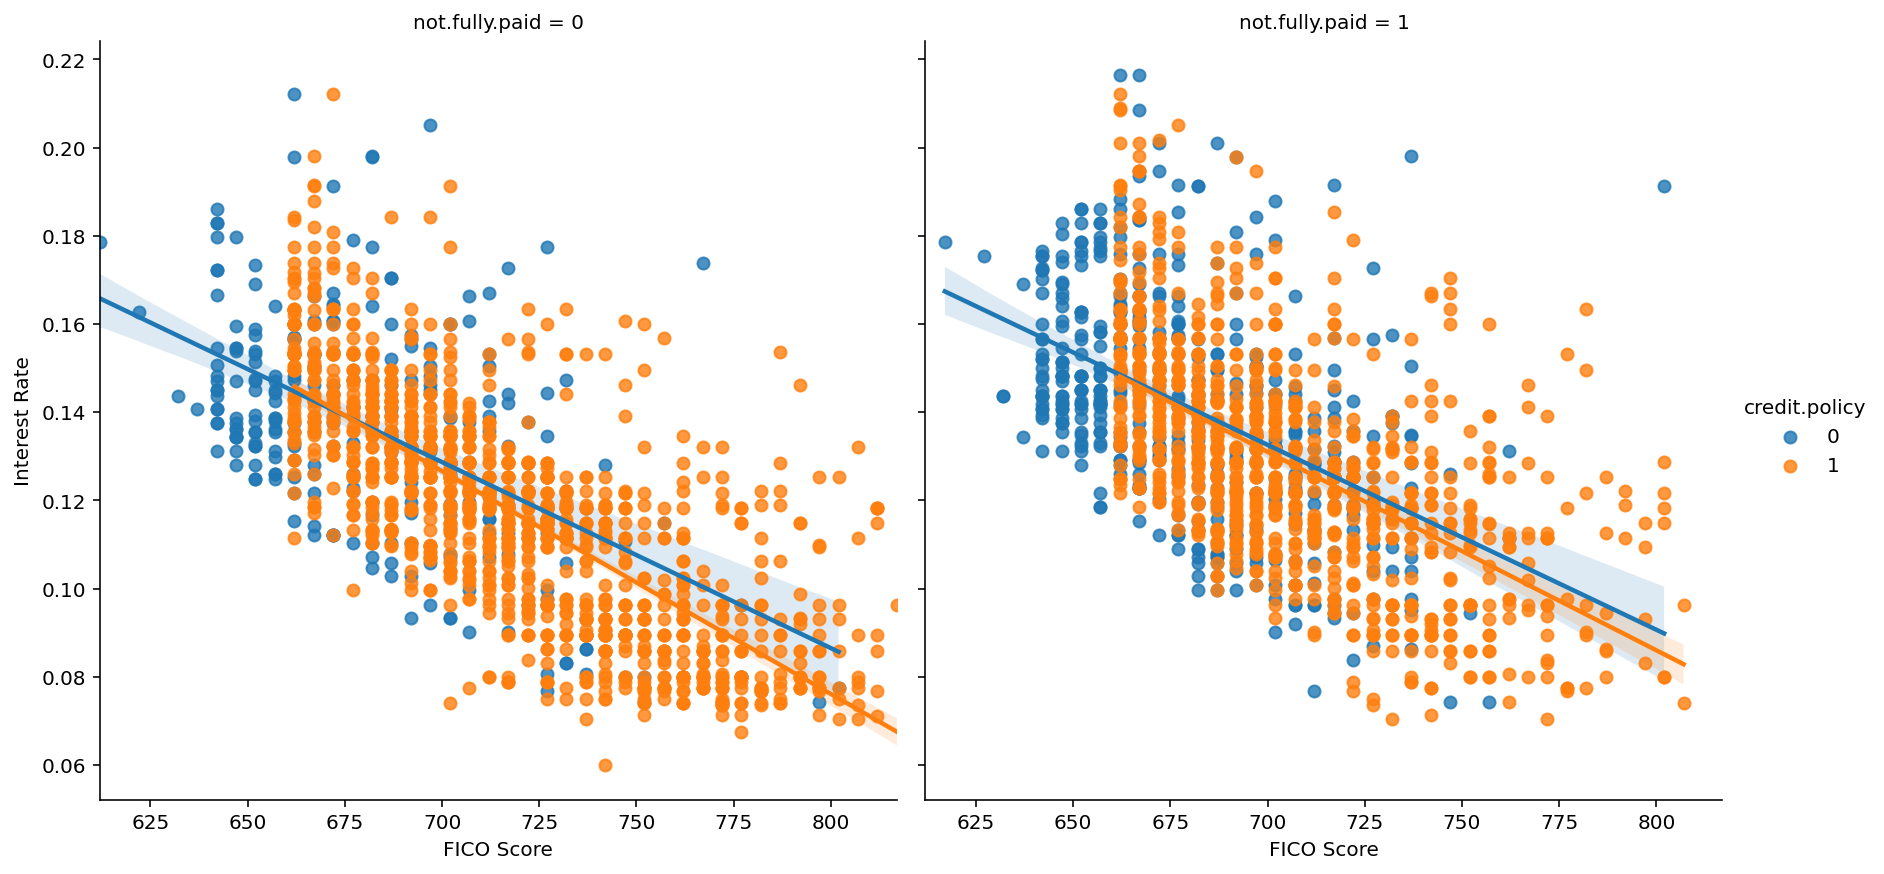

In [16]:
# Create two lmplot figures side by side using Seaborn
g = sns.lmplot(data=loans, x="fico", y="int.rate", hue="credit.policy",
               col="not.fully.paid", height=6)
# Set plot labels
g.set_axis_labels("FICO Score", "Interest Rate")

# Show the plot
plt.show()

# Q3

## Setting up the Data

set up our data for our models!


In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [18]:
cat_feats = ['purpose']

In [19]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [20]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [21]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,False,False,True,False,False,False,False
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,False,False,False,False,False,True,False
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,False,True,False,False,False,False,False
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,False,False,True,False,False,False,False


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,False,False,True,False,False,False,False
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,False,False,False,False,False,True,False
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,False,True,False,False,False,False,False
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,False,False,True,False,False,False,False
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,False,False,True,False,False,False,False
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,False,False,True,False,False,False,False
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,False,False,False,False,True,False,False


In [24]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

<AxesSubplot:xlabel='not.fully.paid'>

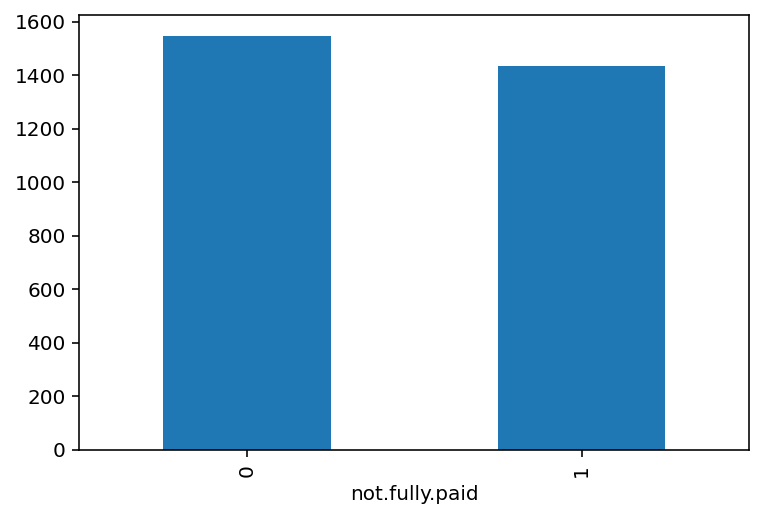

In [25]:
y.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='not.fully.paid'>

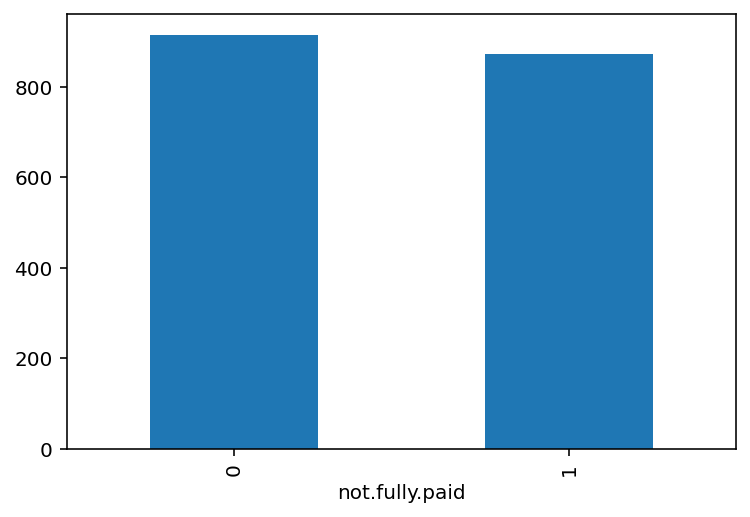

In [26]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='not.fully.paid'>

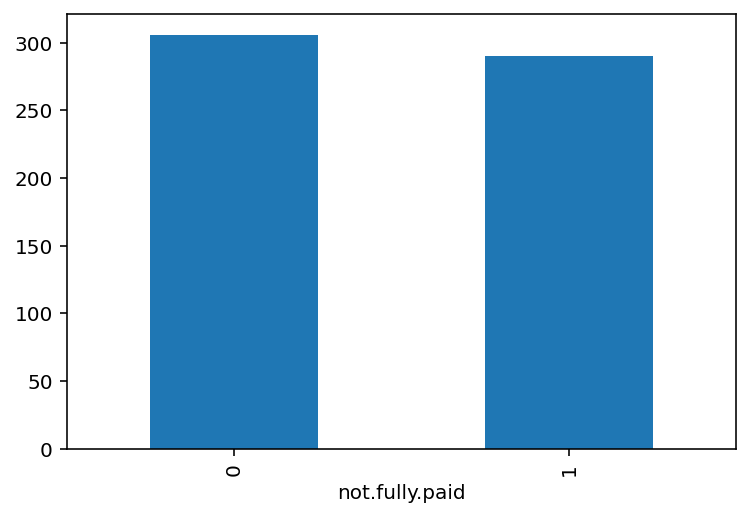

In [27]:
y_val.value_counts().plot(kind='bar')

In [28]:
def plot_variable_importance(model, feature_names):
    """
    Plots the variable importance of a trained model.

    Parameters:
        -- model: object
            The trained model object.
        -- feature_names: list
            A list of feature names.

    Returns:
        None
    """
    # Extract feature importances from the trained model
    importances = model.feature_importances_
    # Sort the feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Plot the variable importance using horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), importances[indices])
    plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
    plt.xlabel('Variable Importance')
    plt.title('Variable Importance Plot')
    plt.show()

# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

In [29]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [30]:
# code
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on validation set
y_val_pred = clf.predict(X_val)

Validation Accuracy: 0.56
Validation Precision: 0.55
Validation Recall: 0.58
Validation F1-score: 0.56
Classification Report:
               precision    recall  f1-score   support

           0      0.578     0.546     0.561       306
           1      0.547     0.579     0.563       290

    accuracy                          0.562       596
   macro avg      0.563     0.563     0.562       596
weighted avg      0.563     0.562     0.562       596



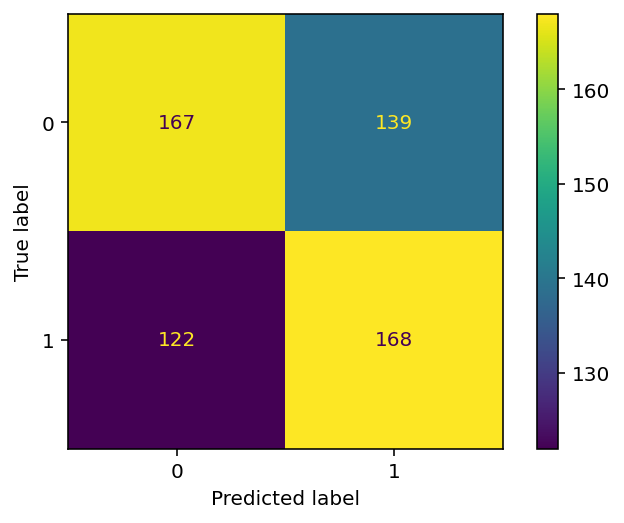

In [31]:
# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [32]:
y_test_pred= clf.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))

Testing Accuracy: 0.59


- ### HyperParameter Tuning with Grid Search

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
Dec_clf = DecisionTreeClassifier()

# Specify the parameter grid for grid search
param_grid = { 'min_samples_split': [5, 10, 20, 30,50]}   # Search for number of samples required to split a node

# Perform grid search using cross-validation
dec_tree_grid_search = GridSearchCV(Dec_clf, param_grid,scoring='f1')  # Use 5-fold cross-validation
dec_tree_grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter value and corresponding score
best_min_samples_split = dec_tree_grid_search.best_params_['min_samples_split']
best_score = dec_tree_grid_search.best_score_

print("Best Min Samples Split: ", best_min_samples_split)
print("F1-score : ", best_score)

Best Min Samples Split:  5
F1-score :  0.557056247568873


Validation Accuracy: 0.58
Validation Precision: 0.57
Validation Recall: 0.57
Validation F1-score: 0.57
Classification Report:
               precision    recall  f1-score   support

           0      0.591     0.585     0.588       306
           1      0.567     0.572     0.569       290

    accuracy                          0.579       596
   macro avg      0.579     0.579     0.579       596
weighted avg      0.579     0.579     0.579       596



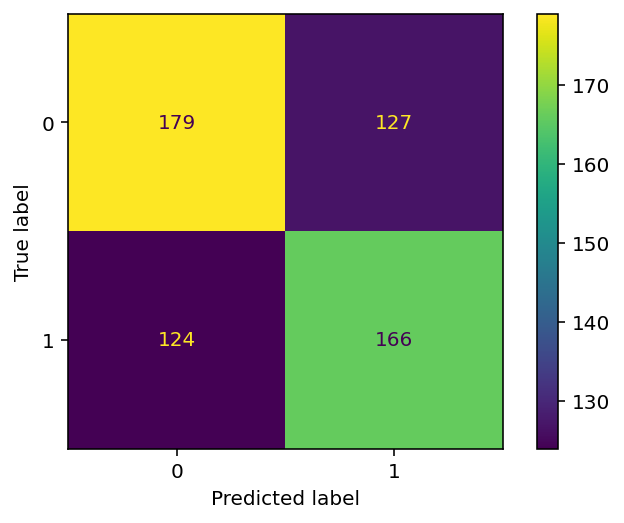

In [34]:
# Make predictions on the validation set
y_val_pred = dec_tree_grid_search.predict(X_val)

# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [35]:

y_test_pred= dec_tree_grid_search.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))


Testing Accuracy: 0.57
Validation Accuracy: 0.58


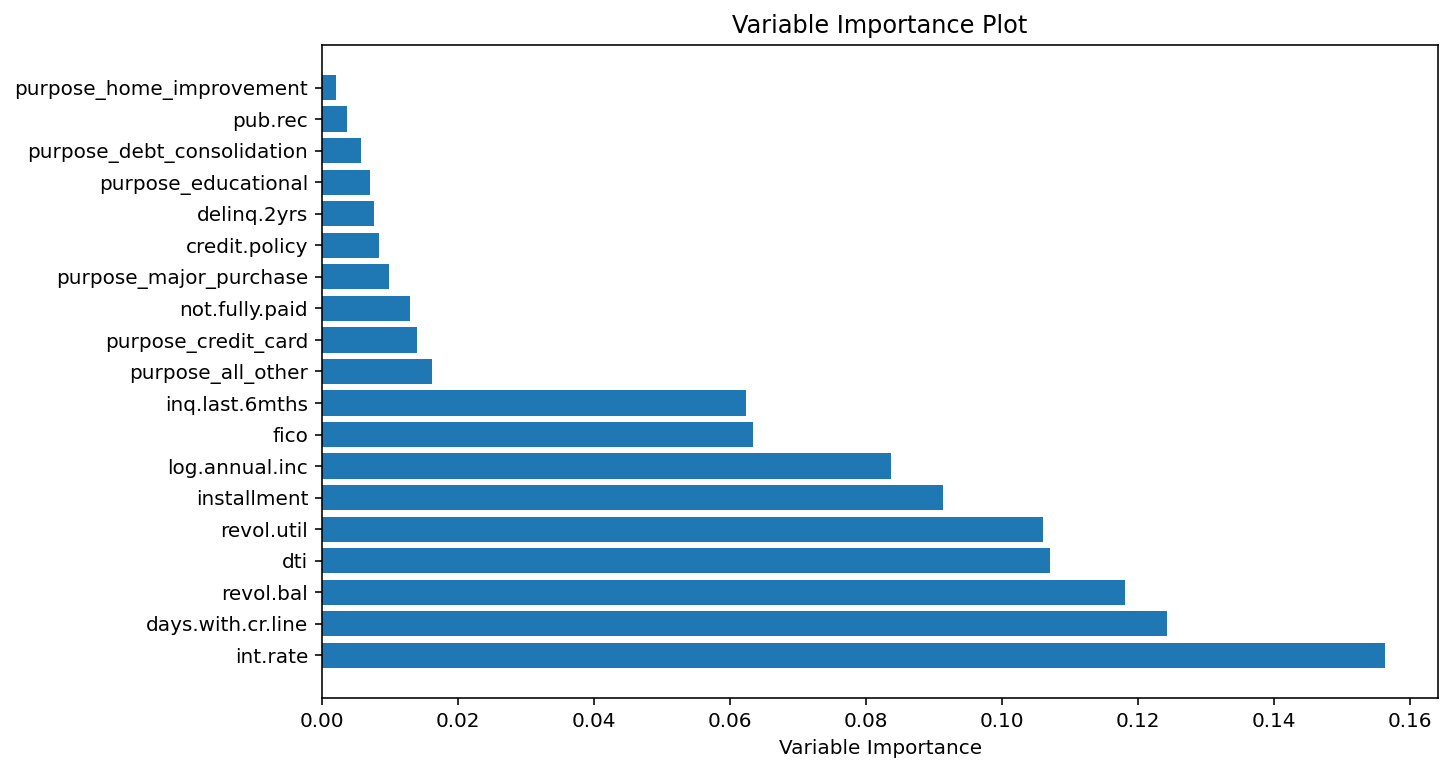

In [36]:
plot_variable_importance(dec_tree_grid_search.best_estimator_, feature_names=loans.columns[:-1])

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Specify the parameter grid for grid search
param_grid = {'max_depth': range(1, 21)}  # Search for maximum depth from 1 to 20

# Perform grid search using cross-validation
dec_tree_grid_search_2 = GridSearchCV(clf, param_grid,scoring='f1',cv=5)  # Use 5-fold cross-validation
dec_tree_grid_search_2.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter value and corresponding score
best_max_depth = dec_tree_grid_search_2.best_params_#['max_depth']
best_score = dec_tree_grid_search_2.best_score_

print("Best Max Depth: ", best_max_depth)
print("F1-score : ", best_score)

Best Max Depth:  {'max_depth': 1}
F1-score :  0.6737353655400848


Validation Accuracy: 0.55
Validation Precision: 0.52
Validation Recall: 0.92
Validation F1-score: 0.67
Classification Report:
               precision    recall  f1-score   support

           0      0.727     0.209     0.325       306
           1      0.524     0.917     0.667       290

    accuracy                          0.554       596
   macro avg      0.625     0.563     0.496       596
weighted avg      0.628     0.554     0.491       596



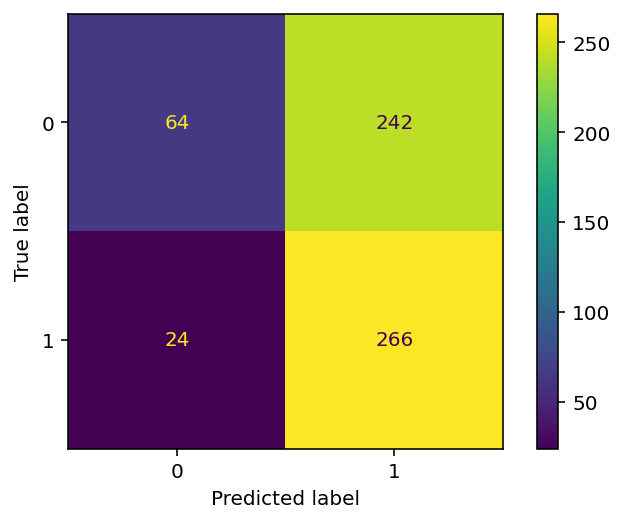

In [38]:
# Make predictions on the validation set
y_val_pred = dec_tree_grid_search_2.predict(X_val)

# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [39]:
y_test_pred= dec_tree_grid_search_2.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))

Testing Accuracy: 0.53
Validation Accuracy: 0.55


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Specify the parameter grid for grid search
param_grid = {
    'max_depth': range(1, 21),  # Search for maximum depth from 1 to 20
    'min_samples_split': [2,3,4,5],  # Search for number of samples required to split a node
}

# Perform grid search using cross-validation
dec_tree_grid_search_3 = GridSearchCV(clf, param_grid, cv=5,scoring='f1')  # Use 5-fold cross-validation
dec_tree_grid_search_3.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_max_depth = dec_tree_grid_search_3.best_params_['max_depth']
best_min_samples_split = dec_tree_grid_search_3.best_params_['min_samples_split']
best_score = dec_tree_grid_search_3.best_score_

print("Best Max Depth: ", best_max_depth)
print("Best Min Samples Split: ", best_min_samples_split)
print("F1-score : ", best_score)

Best Max Depth:  1
Best Min Samples Split:  2
F1-score :  0.6737353655400848


Validation Accuracy: 0.55
Validation Precision: 0.52
Validation Recall: 0.92
Validation F1-score: 0.67
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0      0.727     0.209     0.325       306
           1      0.524     0.917     0.667       290

    accuracy                          0.554       596
   macro avg      0.625     0.563     0.496       596
weighted avg      0.628     0.554     0.491       596



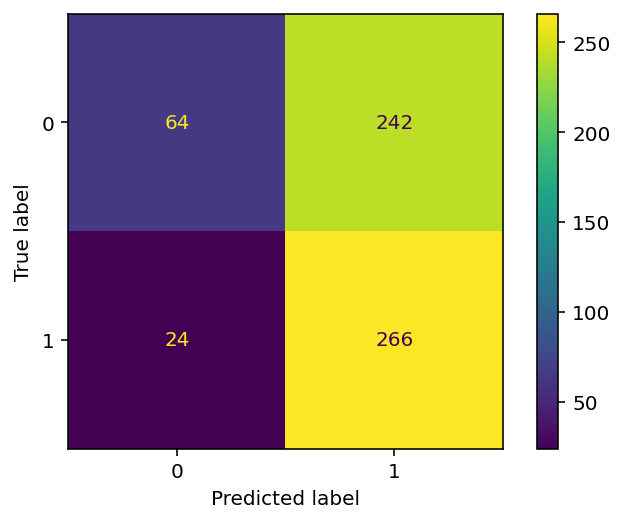

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier with best parameter values
best_max_depth = dec_tree_grid_search_3.best_params_['max_depth']
best_min_samples_split = dec_tree_grid_search_3.best_params_['min_samples_split']

# Get best_estimator_ from the grid search.
# best_estimator_ is already fitted on the full train set.
dec_tree_clf_3 = dec_tree_grid_search_3.best_estimator_

# Make predictions on the validation set
y_val_pred = dec_tree_clf_3.predict(X_val)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

# Print classification report
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred, digits=3))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)

In [42]:
y_test_pred= dec_tree_clf_3.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))

Testing Accuracy: 0.53
Validation Accuracy: 0.55


# Q5

## Random Forest model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# code
# code
# Train a Decision Tree Classifier
random_for_clf = RandomForestClassifier(random_state=42)
random_for_clf.fit(X_train, y_train)

# Predict on validation set
y_val_pred = random_for_clf.predict(X_val)

Validation Accuracy: 0.61
Validation Precision: 0.60
Validation Recall: 0.59
Validation F1-score: 0.59
Classification Report:
               precision    recall  f1-score   support

           0      0.616     0.624     0.620       306
           1      0.598     0.590     0.594       290

    accuracy                          0.607       596
   macro avg      0.607     0.607     0.607       596
weighted avg      0.607     0.607     0.607       596



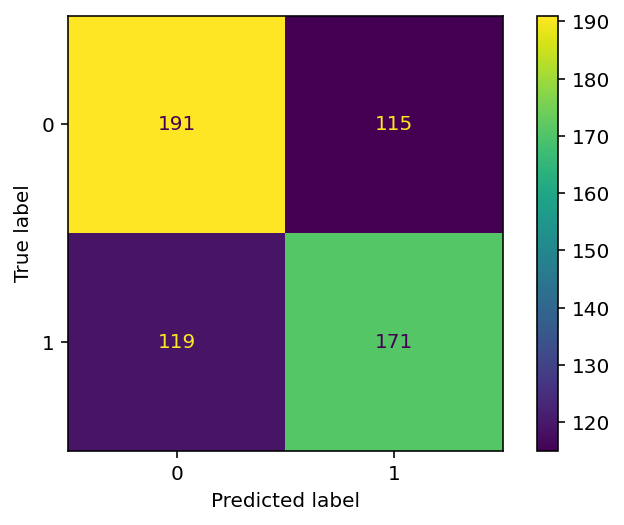

In [45]:
# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [46]:
y_test_pred= random_for_clf.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))

Testing Accuracy: 0.63
Validation Accuracy: 0.61


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
clf = RandomForestClassifier(random_state=42)

# Specify the parameter grid for grid search
param_grid = {
    'n_estimators':[5, 10, 20, 50], #number of estimator
    'max_depth': range(1, 21),  # Search for maximum depth from 1 to 20
    'min_samples_split': [5, 10, 20, 50],  # Search for number of samples required to split a node
}

# Perform grid search using cross-validation
random_for_grid_search = GridSearchCV(clf, param_grid, cv=5,scoring='f1')  # Use 5-fold cross-validation
random_for_grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_max_depth = random_for_grid_search.best_params_['max_depth']
best_min_samples_split = random_for_grid_search.best_params_['min_samples_split']
best_n_estimator = random_for_grid_search.best_params_['n_estimators']
best_score = random_for_grid_search.best_score_

print("Best Max Depth: ", best_max_depth)
print("Best Min Samples Split: ", best_min_samples_split)
print("Best n estimator: ", best_n_estimator)
print("F1-score : ", best_score)

Best Max Depth:  3
Best Min Samples Split:  50
Best n estimator:  10
F1-score :  0.6248823387388037


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0      0.627     0.588     0.607       306
           1      0.592     0.631     0.611       290

    accuracy                          0.609       596
   macro avg      0.610     0.610     0.609       596
weighted avg      0.610     0.609     0.609       596



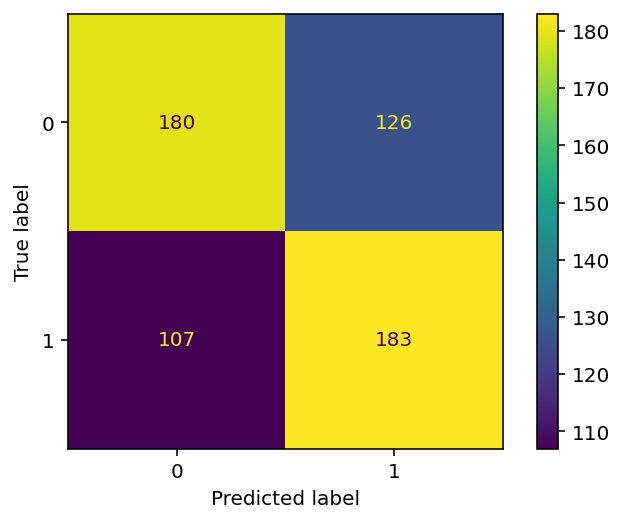

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier with best parameter values

best_max_depth = random_for_grid_search.best_params_['max_depth']
best_min_samples_split = random_for_grid_search.best_params_['min_samples_split']
best_n_estimator = random_for_grid_search.best_params_['n_estimators']

# Get best_estimator_ from the grid search.
# best_estimator_ is already fitted on the full train set.
random_for_clf_1 = random_for_grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = random_for_clf_1.predict(X_val)

# Print classification report
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred, digits=3))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [49]:
y_test_pred= random_for_clf_1.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))


Testing Accuracy: 0.60
Validation Accuracy: 0.61


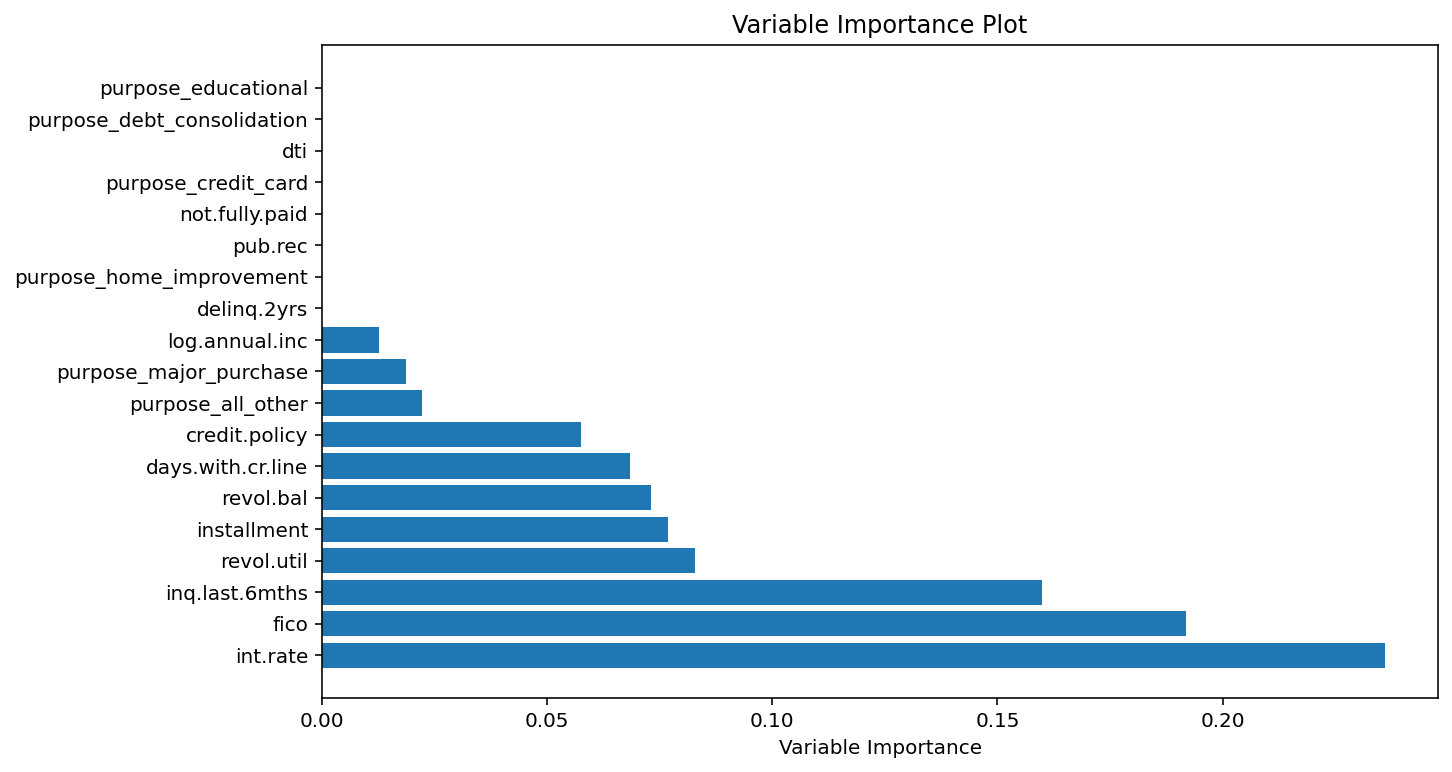

In [50]:
plot_variable_importance(random_for_clf_1, feature_names=loans.columns[:-1])

## Adaboost model

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
# code
# Train a Decision Tree Classifier
ada_boost_clf = AdaBoostClassifier(random_state=42)
ada_boost_clf.fit(X_train, y_train)
# Predict on validation set
y_val_pred = ada_boost_clf.predict(X_val)

Validation Accuracy: 0.59
Validation Precision: 0.57
Validation Recall: 0.59
Validation F1-score: 0.58
Classification Report:
               precision    recall  f1-score   support

           0      0.600     0.578     0.589       306
           1      0.571     0.593     0.582       290

    accuracy                          0.586       596
   macro avg      0.586     0.586     0.586       596
weighted avg      0.586     0.586     0.586       596



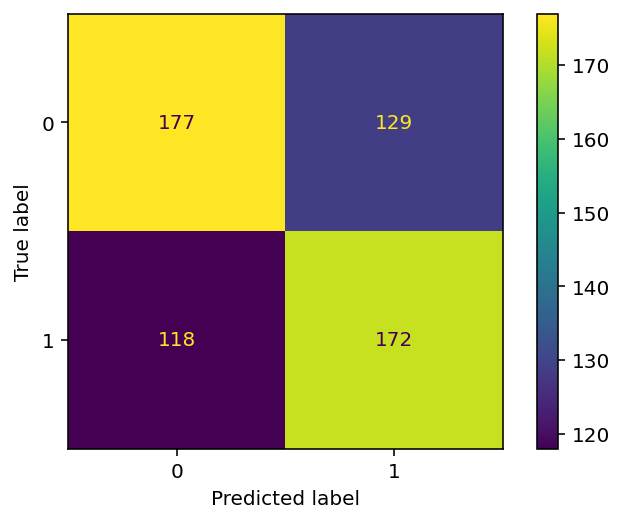

In [53]:
# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [54]:
y_test_pred= ada_boost_clf.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))


Testing Accuracy: 0.60
Validation Accuracy: 0.59


In [55]:
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
clf = AdaBoostClassifier(random_state=42)

# Specify the parameter grid for grid search
param_grid = {
    'n_estimators':[50,60,100,200,300,400,500], #number of estimator
    'learning_rate': [0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

}

# Perform grid search using cross-validation
ada_boost_grid_search = GridSearchCV(clf, param_grid, cv=5,scoring='f1')  # Use 5-fold cross-validation
ada_boost_grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_n_estimator = ada_boost_grid_search.best_params_['n_estimators']
best_learning_rate= ada_boost_grid_search.best_params_['learning_rate']
best_score = ada_boost_grid_search.best_score_


print("Best n estimator: ", best_n_estimator)
print('Best Learning Rate',best_learning_rate)
print("F1-score : ", best_score)

Best n estimator:  50
Best Learning Rate 0.4
F1-score :  0.6111255077819876


Validation Accuracy: 0.59
Validation Precision: 0.58
Validation Recall: 0.59
Validation F1-score: 0.58
Classification Report:
               precision    recall  f1-score   support

           0      0.604     0.598     0.601       306
           1      0.580     0.586     0.583       290

    accuracy                          0.592       596
   macro avg      0.592     0.592     0.592       596
weighted avg      0.592     0.592     0.592       596



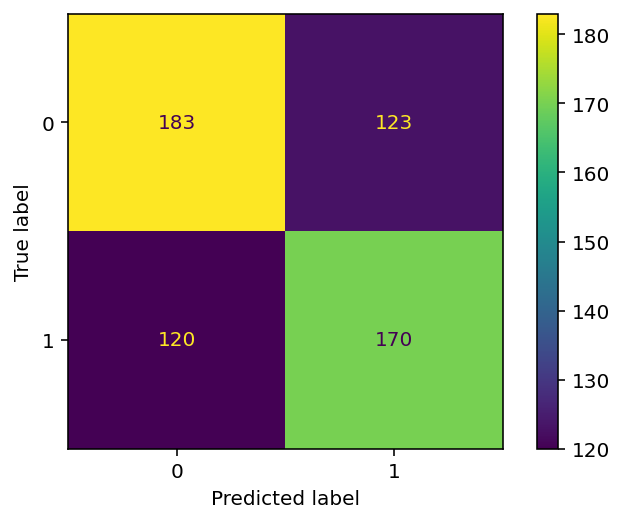

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier with best parameter values

best_n_estimator = ada_boost_grid_search.best_params_['n_estimators']
best_learning_rate= ada_boost_grid_search.best_params_['learning_rate']

# Get best_estimator_ from the grid search.
# best_estimator_ is already fitted on the full train set.
ada_boost_grid_clf = ada_boost_grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = ada_boost_grid_clf.predict(X_val)

# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [57]:
y_test_pred= ada_boost_grid_clf.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))


Testing Accuracy: 0.59
Validation Accuracy: 0.59


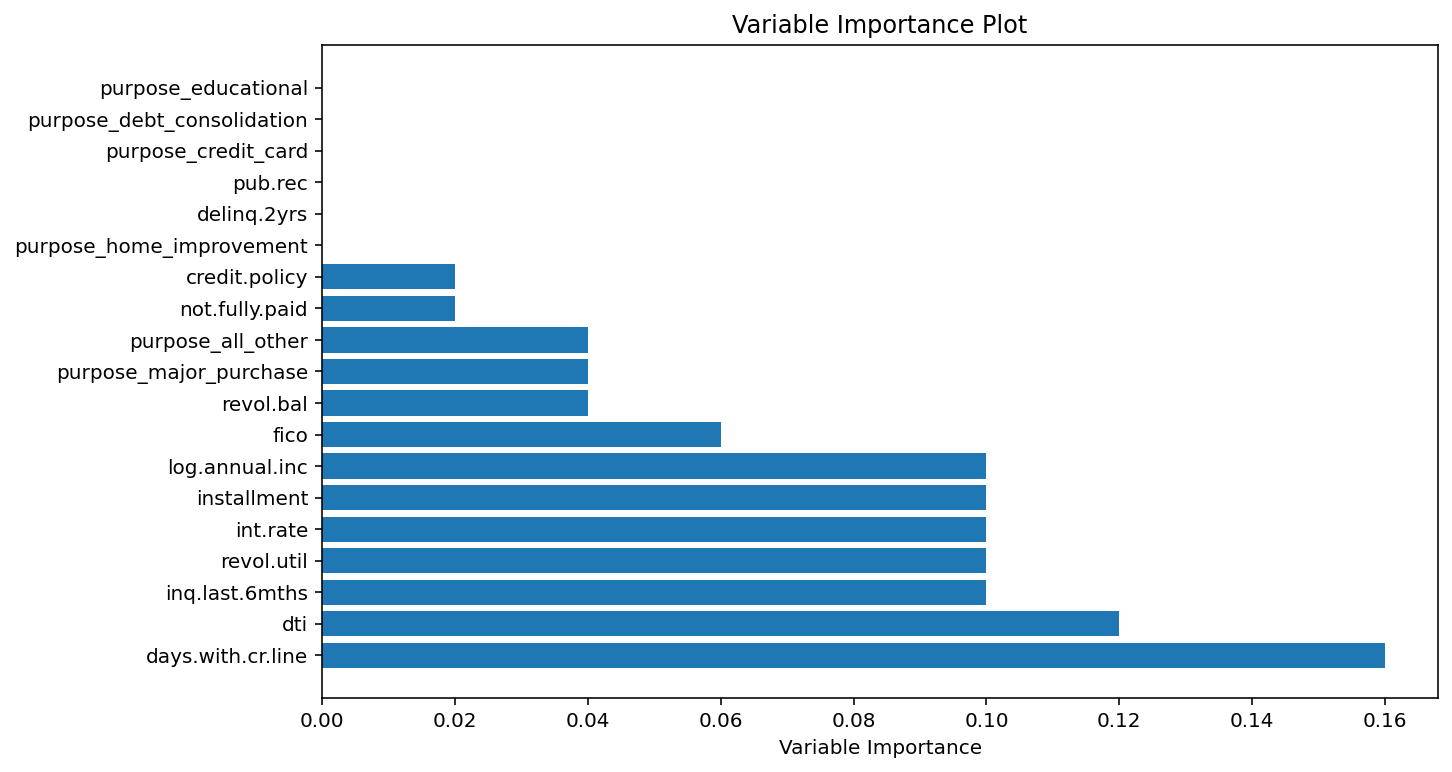

In [58]:
plot_variable_importance(ada_boost_grid_clf, feature_names=loans.columns[:-1])

## Gradient Boosting Machine

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
# YOUR CODE
# code
# Train a Decision Tree Classifier
grad_boost_clf = GradientBoostingClassifier(random_state=42)
grad_boost_clf.fit(X_train, y_train)

# Predict on validation set
y_val_pred = grad_boost_clf.predict(X_val)

Validation Accuracy: 0.61
Validation Precision: 0.60
Validation Recall: 0.59
Validation F1-score: 0.60
Classification Report:
               precision    recall  f1-score   support

           0      0.619     0.631     0.625       306
           1      0.602     0.590     0.596       290

    accuracy                          0.611       596
   macro avg      0.610     0.610     0.610       596
weighted avg      0.611     0.611     0.611       596



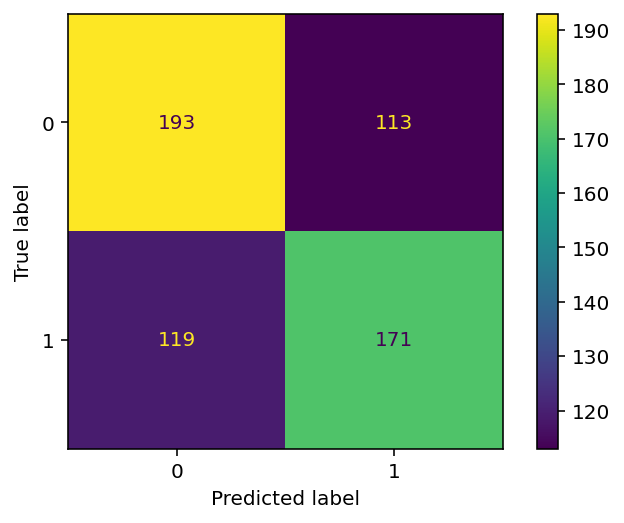

In [61]:
# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


In [62]:
y_test_pred= grad_boost_clf.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))


Testing Accuracy: 0.61
Validation Accuracy: 0.61


In [63]:
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
clf = GradientBoostingClassifier(random_state=42)

# Specify the parameter grid for grid search
param_grid = {
    'n_estimators':[5, 10, 20, 50,60,100], #number of estimator
    'learning_rate': [0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

}

# Perform grid search using cross-validation
grad_boost_grid_search = GridSearchCV(clf, param_grid, cv=5,scoring='f1')  # Use 5-fold cross-validation
grad_boost_grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_n_estimator = grad_boost_grid_search.best_params_['n_estimators']
best_learning_rate= grad_boost_grid_search.best_params_['learning_rate']
best_score = grad_boost_grid_search.best_score_


print("Best n estimator: ", best_n_estimator)
print('Best Learning Rate',best_learning_rate)
print("F1-score : ", best_score)

Best n estimator:  60
Best Learning Rate 0.1
F1-score :  0.6109951279985972


Validation Accuracy: 0.61
Validation Precision: 0.60
Validation Recall: 0.59
Validation F1-score: 0.59
Classification Report:
               precision    recall  f1-score   support

           0      0.615     0.621     0.618       306
           1      0.596     0.590     0.593       290

    accuracy                          0.606       596
   macro avg      0.605     0.605     0.605       596
weighted avg      0.606     0.606     0.606       596



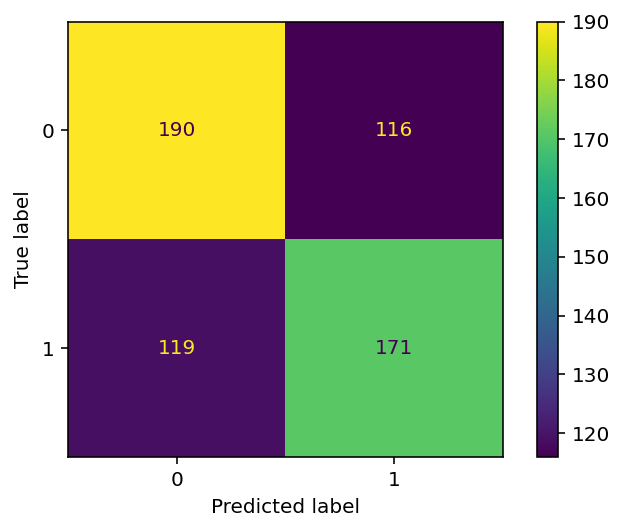

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier with best parameter values

best_n_estimator = grad_boost_grid_search.best_params_['n_estimators']
best_learning_rate= grad_boost_grid_search.best_params_['learning_rate']

# Get best_estimator_ from the grid search.
# best_estimator_ is already fitted on the full train set.
grad_boost_grid_clf = grad_boost_grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = grad_boost_grid_clf.predict(X_val)

# Calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

print("Classification Report:\n", classification_rep)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)



In [65]:
y_test_pred= grad_boost_grid_clf.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Validation Accuracy: {:.2f}".format(accuracy))


Testing Accuracy: 0.61
Validation Accuracy: 0.61


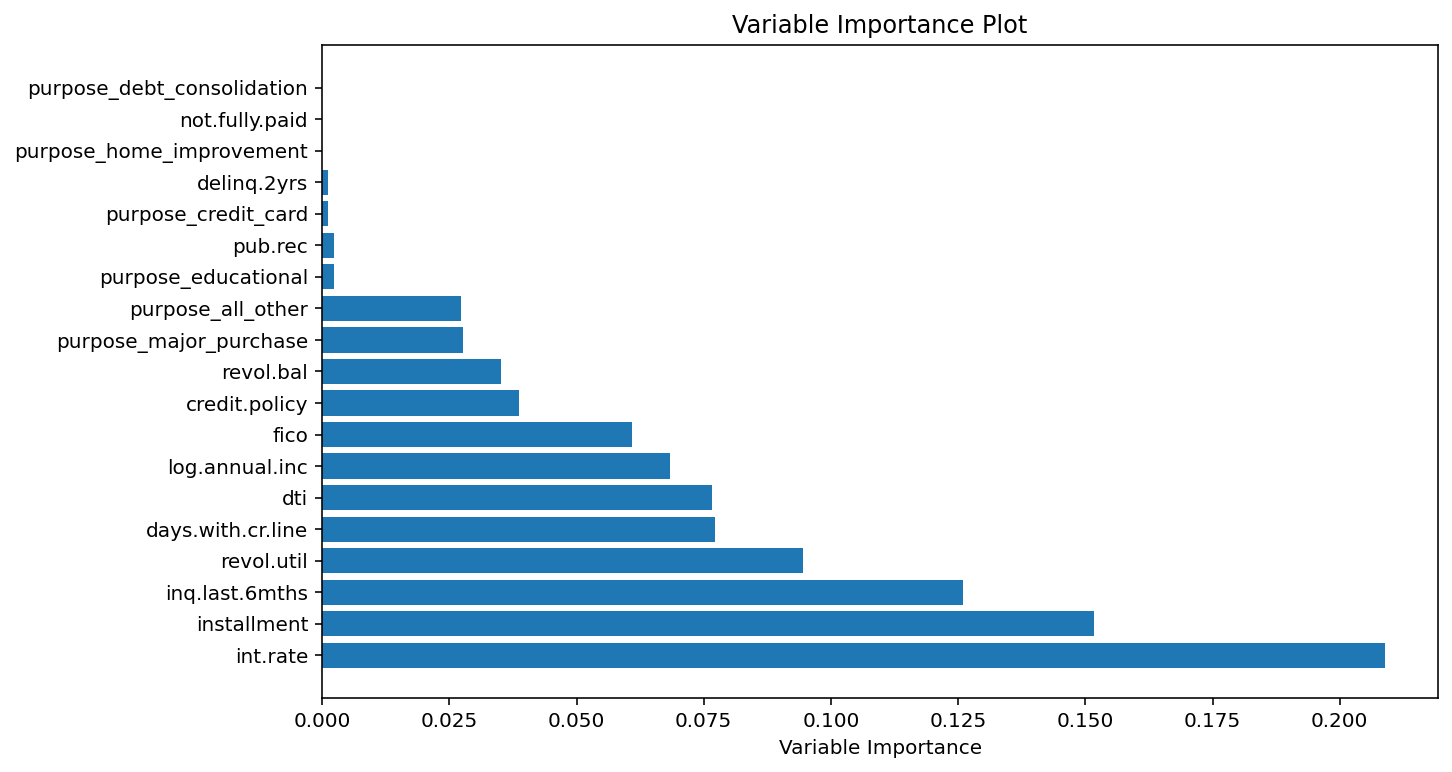

In [66]:
plot_variable_importance(grad_boost_grid_clf, feature_names=loans.columns[:-1])

## Other Methods to try to improve F1-score

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?
    
    
- Adjust class weights: Class weights can be adjusted to put more emphasis on the underrepresented class, which can improve recall. This is particularly useful in imbalanced datasets where one class has significantly fewer instances than the other(s).

- Feature selection: Selecting the most relevant features for the model can improve its performance. This can be done using techniques like Recursive Feature Elimination (RFE) or feature importance scores from the model itself.

- Feature Selection

In [67]:
# Feature selection
from sklearn.feature_selection import RFE

In [68]:
model= grad_boost_grid_clf
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_val)
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

print("Validation F1-score: {:.3f}".format(f1_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))
#print(classification_report(y_val, y_val_pred, digits=3))

Validation F1-score: 0.591
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       306
           1       0.59      0.59      0.59       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.60       596
weighted avg       0.60      0.60      0.60       596



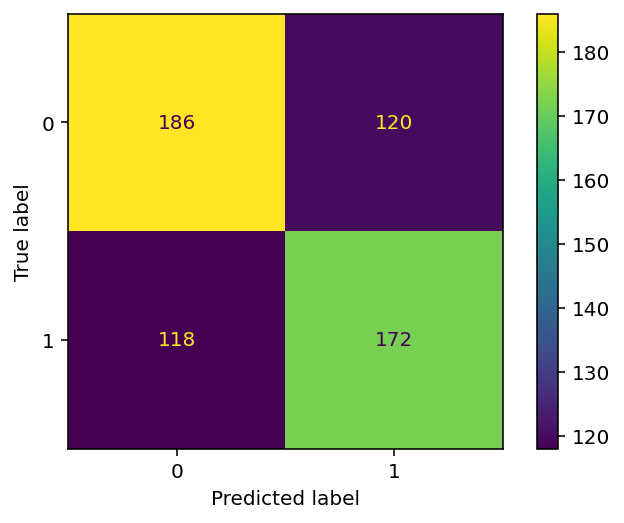

In [69]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)

In [70]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Define models
models = {
    #"Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
   # "Adaboost": AdaBoostClassifier(),
    #"Gradient Boosting": GradientBoostingClassifier()
}

# Adjust class weights
for name, model in models.items():
    model = model.set_params(class_weight="balanced")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name}:")
    #print(classification_report(y_test, y_pred))
    
    print(f1_score(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred, digits=3))


Random Forest:
0.5927209705372617
              precision    recall  f1-score   support

           0      0.615     0.621     0.618       306
           1      0.596     0.590     0.593       290

    accuracy                          0.606       596
   macro avg      0.605     0.605     0.605       596
weighted avg      0.606     0.606     0.606       596



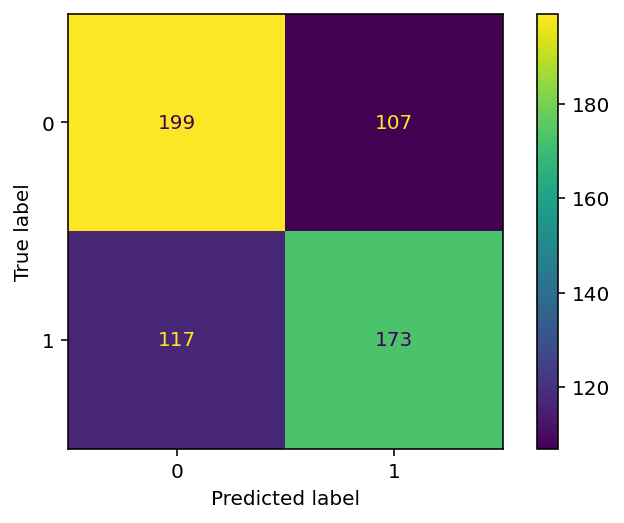

In [71]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

- ### Which one is the winner among all? The random forest performa well with F-1 score: 0.59

In [72]:
### This function uses fitted model to show model parformance on TEST SET

def result_on_test(model,X_test,y_test):
    """
    Show performamce matrix for a fitted model

    Parameters:
        -- model: object
            The trained model object.
        -- X : any list of observatio
            y: is the target 

    Returns:
        FULL PERFORMANCE MATRIX
    """
    #
    y_test_pred= model.predict(X_test)
    # Calculate performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # print evaluation results with 2 decimal points
    print("Testing Accuracy: {:.2f}".format(test_accuracy))
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred, digits=3)

    # Print performance metrics and classification report
    # print evaluation results with 2 decimal points
    print("Testing Accuracy: {:.2f}".format(accuracy))
    print("Testing Precision: {:.2f}".format(precision))
    print("Testing Recall: {:.2f}".format(recall))
    print("Testing F1-score: {:.2f}".format(f1))

    print("Classification Report:\n", classification_rep)

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)




    

- ## Decision Tree

Testing Accuracy: 0.57
Testing Accuracy: 0.57
Testing Precision: 0.52
Testing Recall: 0.57
Testing F1-score: 0.55
Classification Report:
               precision    recall  f1-score   support

           0      0.616     0.569     0.591       327
           1      0.522     0.570     0.545       270

    accuracy                          0.570       597
   macro avg      0.569     0.570     0.568       597
weighted avg      0.573     0.570     0.570       597



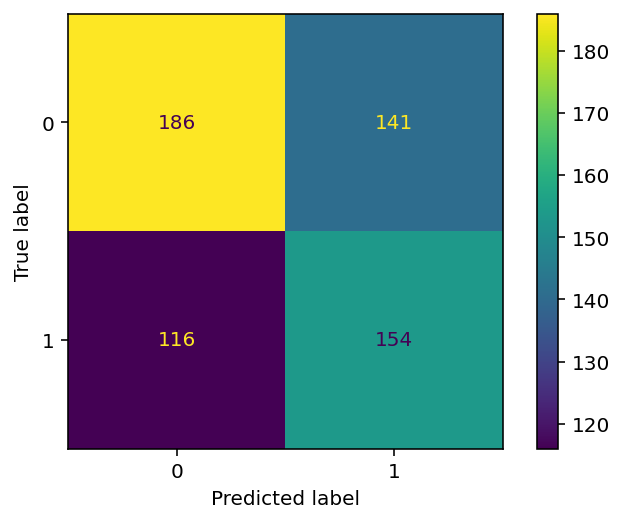

In [73]:
result_on_test(dec_tree_grid_search,X_test,y_test)

- ## Random Forest

Testing Accuracy: 0.60
Testing Accuracy: 0.60
Testing Precision: 0.56
Testing Recall: 0.62
Testing F1-score: 0.59
Classification Report:
               precision    recall  f1-score   support

           0      0.654     0.590     0.621       327
           1      0.556     0.622     0.587       270

    accuracy                          0.605       597
   macro avg      0.605     0.606     0.604       597
weighted avg      0.610     0.605     0.606       597



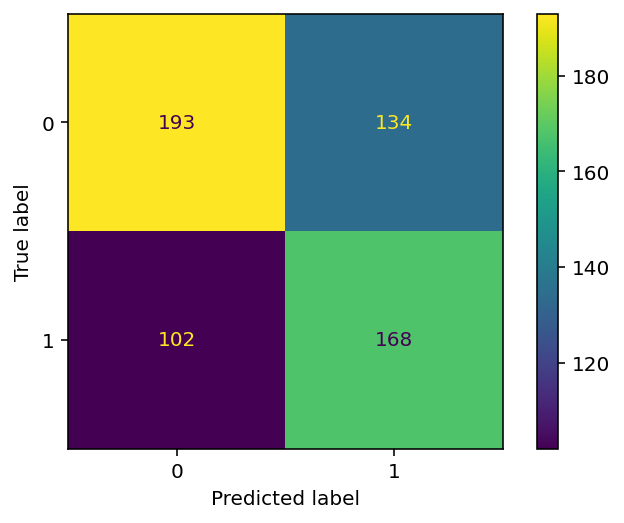

In [74]:
result_on_test(random_for_clf_1,X_test,y_test)

- ## Adaboost

Testing Accuracy: 0.59
Testing Accuracy: 0.59
Testing Precision: 0.54
Testing Recall: 0.57
Testing F1-score: 0.56
Classification Report:
               precision    recall  f1-score   support

           0      0.630     0.609     0.619       327
           1      0.544     0.567     0.555       270

    accuracy                          0.590       597
   macro avg      0.587     0.588     0.587       597
weighted avg      0.591     0.590     0.590       597



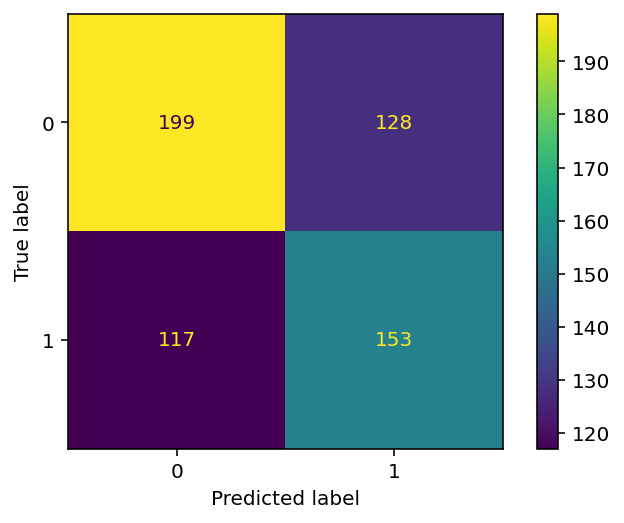

In [75]:
result_on_test(ada_boost_grid_clf,X_test,y_test)